<a href="https://colab.research.google.com/github/RaicLee/Jpub_AI22/blob/master/Chapter3-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


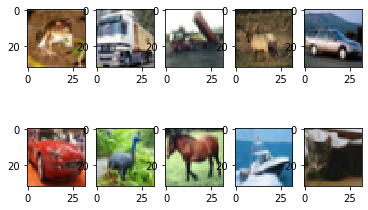

In [4]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])
plt.show()


In [5]:
print(train_labels[:10].flatten())


[6 9 9 4 1 1 2 7 8 3]


In [0]:

# make every value in image between 0 and 1
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0
#print(train_images[0][0][0][:2])

In [7]:
print(train_labels.shape)
print(test_labels.shape)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels.shape)
print(test_labels.shape)

(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)


In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])
history=model.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)
model.save('convol.h5')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 12s 301us/sample - loss: 1.7486 - acc: 0.3638 - val_loss: 1.3583 - val_acc: 0.5152
Epoch 2/20
40000/40000 [==============================] - 6s 139us/sample - loss: 1.2734 - acc: 0.5434 - val_loss: 1.1700 - val_acc: 0.5843
Epoch 3/20
40000/40000 [==============================] - 6s 138us/sample - loss: 1.0910 - acc: 0.6115 - val_loss: 0.9590 - val_acc: 0.6695
Epoch 4/20
40000/40000 [==============================] - 6s 138us/sample - loss: 0.9582 - acc: 0.6628 - val_loss: 0.8407 - val_acc: 0.7023
Epoch 5/20
40000/40000 [==============================] - 6s 139us/sample - loss: 0.8702 - acc: 0.6946 - val_loss: 0.8299 - val_acc: 0.7129
Epoch 6/20
40000/40000 [==============================] - 6s 138us/sample - loss: 0.7921 - acc: 0.7210 - val_loss: 0.7840 - val_acc: 0.7286
Epoch 7/20
40000/40000 [====

In [9]:
model=load_model('convol.h5')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


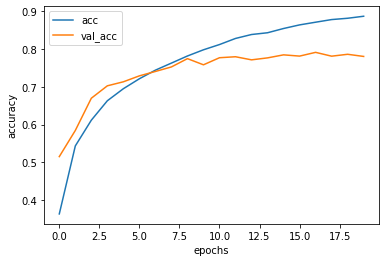

In [11]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='best')
plt.show()

In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('loss: {:3f}\nacc: {:3f}'.format(test_loss,test_acc))


10000/10000 [==============================] - 1s 112us/sample - loss: 0.7489 - acc: 0.7724
loss: 0.748893
acc: 0.772400


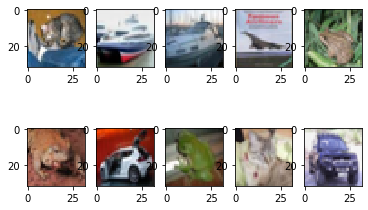

In [14]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i])
plt.show()


In [17]:
test_predictions=model.predict(test_images[:10])
test_predictions=np.argmax(test_predictions,axis=1)
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print([labels[n] for n in test_predictions])


['dog', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
